<a href="https://colab.research.google.com/github/MStuardo50/Micro-I/blob/main/E_Portafolio_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portafolio Estadística

Integrantes:

- Badilla, Alexis: Se encargará de interpretar y responder la Pregunta 2 del trabajo.
- Pereira, Lucas: Se encargará de interpretar y responder la pregunta 1.C del trabajo.
- Quezada, Joakina: Se encargará de interpretar y responder la pregunta 1.A del trabajo.
- Robles, Marcela: Se encargará de interpretar y responder la pregunta 1.B del trabajo.
- Stuardo, Maximiliano: Se encargará de elaborar insumos visuales (gráficos) con entorno de ejecución R, para ser usados en la interpretación de las preguntas propuestas.

In [2]:
datos = read.csv("https://raw.githubusercontent.com/Dfranzani/Bases-de-datos-para-cursos/refs/heads/main/2024-1/FondosDeCesantia.csv")
str(datos)

'data.frame':	366 obs. of  5 variables:
 $ Fecha : chr  "2024-01-01" "2024-01-02" "2024-01-03" "2024-01-04" ...
 $ VC_CIC: num  3478 3476 3470 3466 3463 ...
 $ VP_CIC: num  8.70e+12 8.66e+12 8.65e+12 8.64e+12 8.63e+12 ...
 $ VC_FCS: num  4025 4019 4008 3998 3994 ...
 $ VP_FCS: num  2.73e+12 2.72e+12 2.71e+12 2.70e+12 2.70e+12 ...


In [3]:
library(dplyr)
library(ggplot2)

datos$Mes = substr(datos$Fecha, start = 6, stop = 7)
meses = c("enero", "febrero", "marzo", "abril", "mayo", "junio", "julio",
"agosto", "septiembre", "octubre", "noviembre", "diciembre")
datos$NombreMes = meses[as.numeric(datos$Mes)]

# Pregunta 1.A

Un grafico de violín con caja y promedio del valor cuota del Fondo de la Cuenta Individual de Cesantía, separado por mes (filtrado de enero a abril). Considere interpretar los graficos en conjunto y por separado en un máximo 600 caracteres (una mayor cantidad invalidara su respuesta a la pregunta).  ́



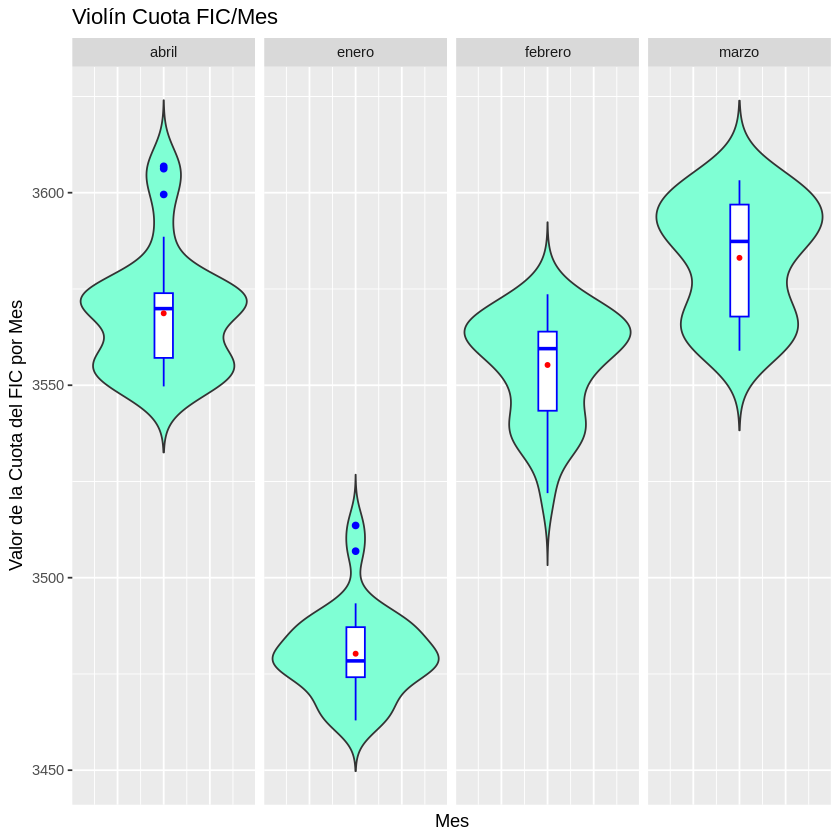

In [4]:
datos2 = datos %>%
  filter(NombreMes %in% c("enero", "febrero", "marzo", "abril"))

ggplot(data = datos2, aes(x = 1, y = VC_CIC)) +
  geom_violin(trim = F, fill = "aquamarine") +
  geom_boxplot(width = 0.1, color = "blue", fill = "white") +
  stat_summary(fun = mean, geom = "point", size = 1, color = "red") +
  facet_wrap(vars(NombreMes), nrow = 1) +
    theme(axis.ticks.x = element_blank(),
    axis.text.x = element_blank())+
      labs(x = "Mes",
    y = "Valor de la Cuota del FIC por Mes",
    title = "Violín Cuota FIC/Mes")

# Pregunta 1.B

Un grafico de dispersión de la valor cuota del Fondo de Cesantía Solidario (eje x) y el valor del patrimonio del Fondo de Cesantía Solidario (eje y), coloree los puntos del grafico según el mes de medicion (filtrado de octubre a diciembre). Interprete en un máximo 500 caracteres (una mayor cantidad invalidara su respuesta a la pregunta).

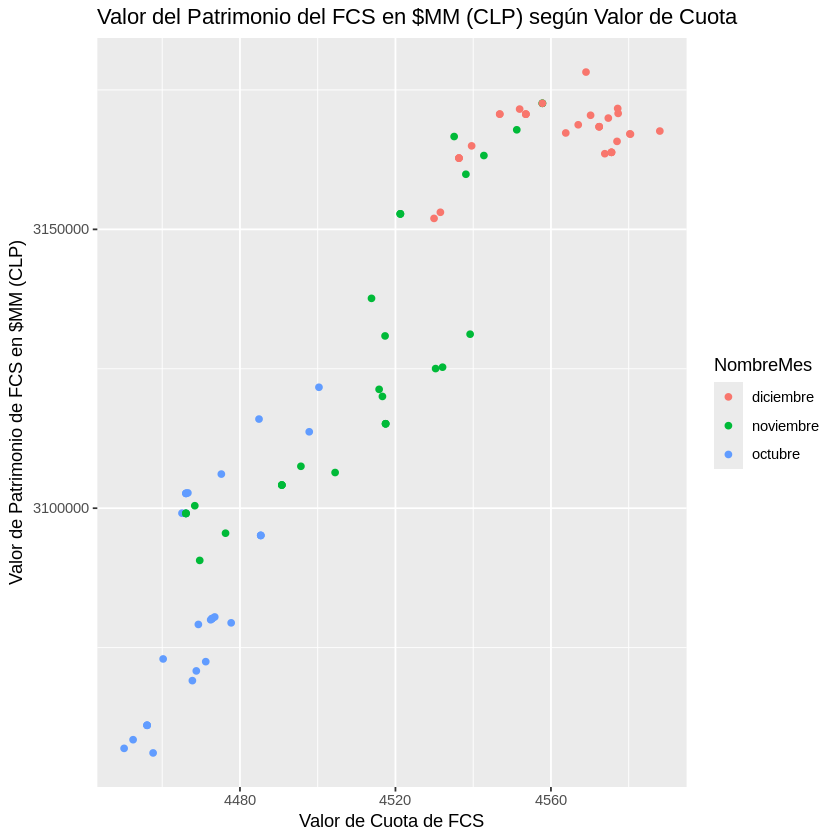

In [5]:
datos3 = datos %>%
  mutate(VP_FCS = VP_FCS/1000000) %>%
  filter(NombreMes %in% c("octubre", "noviembre", "diciembre"))

ggplot(data = datos3, aes(x = VC_FCS, y = VP_FCS, colour = NombreMes)) +
  geom_point() +
    labs(title = "Valor del Patrimonio del FCS en $MM (CLP) según Valor de Cuota",
  x = "Valor de Cuota de FCS",
  y = "Valor de Patrimonio de FCS en $MM (CLP)")

# Pregunta 1.C

`geom_smooth()` using formula = 'y ~ x'


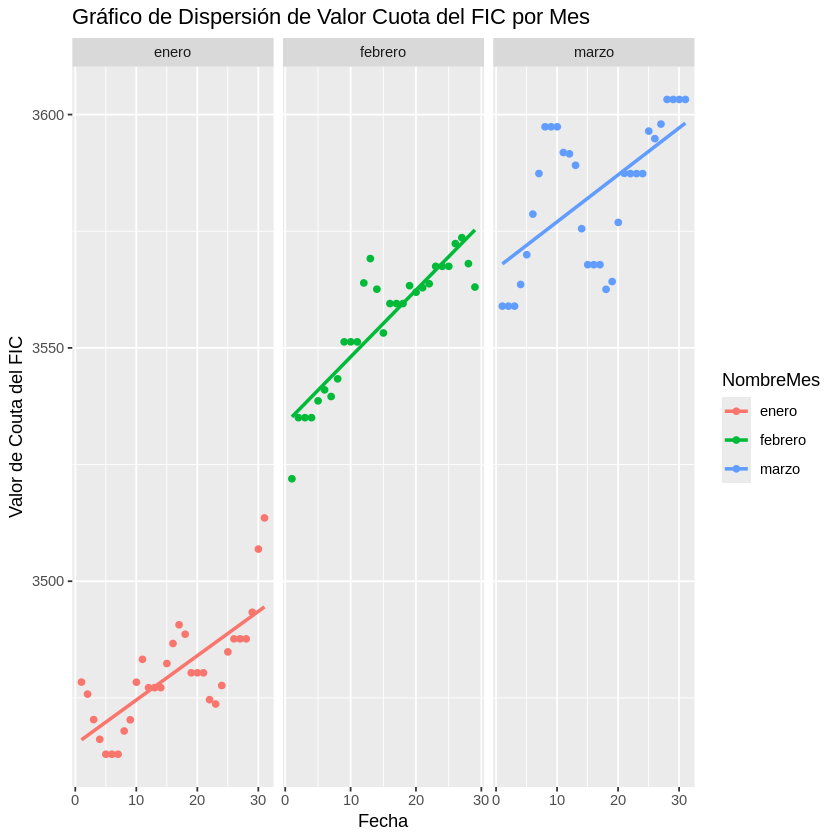

In [ ]:
datos4 = datos2 %>%
  filter(NombreMes %in% c("enero", "febrero", "marzo"))

datos4$Mes2 = substr(datos4$Fecha, start = 6, stop = 7)
datos4$Dia = substr(datos4$Fecha, start = 9, stop = 10)
datos4$DiayMes = paste(datos4$Dia, datos4$Mes2)

datos4$DiayMes = as.numeric(sub(" ",".",datos4$DiayMes))

ggplot(data = datos4, aes(x = DiayMes, y = VC_CIC, color = NombreMes)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(vars(NombreMes), nrow = 1, scales = "free_x") +
  labs(title = "Gráfico de Dispersión de Valor Cuota del FIC por Mes",
       x = "Fecha",
       y = "Valor de Couta del FIC")

# Pregunta 2